## AA521 Final Project

### Data Preprocessing & Model Integration (FaceNet and DeepFace)
- Data Handing
    - Download data
    - Split data into train and test, if applicable
- Preproessing for Facenet
    - Use a face detector (e.g., MTCNN) to detect and align faces.
    - Resize images
- Preprocessing for DeepFace
    - Alignment and resizing done automatically
- Embedding Extraction:
    - Use both FaceNet and DeepFace models to extract embeddings for the face images.

In [5]:
from google.colab import drive
import gdown
import os

user = 'SUVO' # SUVO or OTHER

if user == 'SUVO':
  drive.mount('/content/drive')
else:
  drive.mount('/content/drive')

  # Specify the destination folder in Google Drive
  destination_folder = '/content/drive/MyDrive/AAI521_FinalProject'

  # Ensure the folder exists
  os.makedirs(destination_folder, exist_ok=True)

  # Change to destination folder
  os.chdir(destination_folder)

  # Shared file link
  file_id = "1-6-eiCCgR9MCCCR9cN6jAnjJaUhtRT40"
  file_url = f"https://drive.google.com/uc?id={file_id}"

  # Output filename
  output_filename = "lfw-deepfunneled.tgz"

  # Download file
  gdown.download(file_url, output=output_filename, quiet=False)

  print(f"File downloaded to: {destination_folder}/{output_filename}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import tarfile

# Path to the .tgz file
if user == 'SUVO':
    file_path = '/content/drive/MyDrive/AA521-AppliedComputerVision/Final_Project/lfw-deepfunneled.tgz'
    base_path = '/content/drive/MyDrive/AA521-AppliedComputerVision/Final_Project'
else:
    file_path = os.path.join(destination_folder, 'lfw-deepfunneled.tgz')
    base_path = destination_folder

# Create the 'lfw' folder
extract_path = os.path.join(base_path, 'lfw')

# Check if 'lfw' folder already exists
if not os.path.exists(extract_path):
    # Create the 'lfw' folder
    os.makedirs(extract_path, exist_ok=True)

    # Extract the .tgz file inside the 'lfw' folder
    with tarfile.open(file_path, 'r:gz') as tar:
        tar.extractall(path=extract_path)
        print(f"Extracted to {extract_path}")
else:
    print(f"The folder 'lfw' already exists at {extract_path}. Extraction skipped.")


The folder 'lfw' already exists at /content/drive/MyDrive/AA521-AppliedComputerVision/Final_Project/lfw. Extraction skipped.


In [7]:
# YOU CAN SKIP THIS CELL AND LOAD DATA IN NEXT CELL BY SETTING LOAD=1 AND SAVE=0

import cv2
import numpy as np
from tqdm import tqdm

# Path to the LFW dataset
if user == 'SUVO':
    root_path = base_path
else:
    root_path = destination_folder

dataset_path = 'lfw/lfw-deepfunneled'
full_path = os.path.join(root_path, dataset_path)

# Initialize empty lists for images and labels
images = []
labels = []

subfolders = os.listdir(full_path)[:100]  # REMOVE [:100] FOR ALL IMAGES

# Iterate through each subfolder
for label in tqdm(subfolders, desc="Processing Folders"):
    subfolder_path = os.path.join(full_path, label)

    # Iterate through each image in the subfolder
    for image_name in os.listdir(subfolder_path):
        image_path = os.path.join(subfolder_path, image_name)

        # Read the image
        image = cv2.imread(image_path)
        if image is not None:
            # Convert the image to RGB format (DeepFace requires RGB)
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Resize the image to 160x160 (required by FaceNet)
            image_resized = cv2.resize(image_rgb, (160, 160))

            # Append the processed image and corresponding label
            images.append(image_resized)
            labels.append(label)

# Convert to numpy arrays
images = np.array(images)
labels = np.array(labels)

print(' ')
print(f"Total images: {len(images)}")
print(f"Total labels: {len(labels)}")

Processing Folders: 100%|██████████| 100/100 [01:47<00:00,  1.08s/it]

Total images: 235
Total labels: 235


In [8]:
import pickle

SAVE = 0
LOAD = 0

# Path to save the dataset
save_path = os.path.join(base_path, 'lfw_data.pkl')

if SAVE == True:

  # Save the images and labels
  with open(save_path, 'wb') as f:
      pickle.dump({'images': images, 'labels': labels}, f)

  print(f"Data saved successfully to {save_path}")

if LOAD == True:

  # Load the dataset
  with open(save_path, 'rb') as f:
      data = pickle.load(f)

  images = data['images']
  labels = data['labels']

  print(f"Data loaded successfully")
  print(f"Total images: {len(images)}, Total labels: {len(labels)}")


Data saved successfully to /content/drive/MyDrive/AA521-AppliedComputerVision/Final_Project/lfw_data.pkl


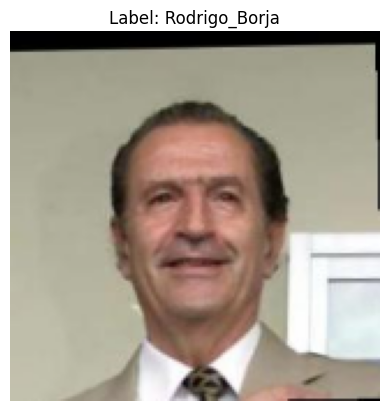

In [9]:
import matplotlib.pyplot as plt

# Display the first image and its label
plt.imshow(images[0])  # Display the first image in grayscale
plt.title(f"Label: {labels[0]}")    # Show the corresponding label
plt.axis('off')  # Turn off the axis
plt.show()


In [10]:
from sklearn.model_selection import train_test_split
import numpy as np
from collections import Counter

# Count the number of samples per class
label_counts = Counter(labels)

# Filter out classes with fewer than 2 samples
valid_classes = [label for label, count in label_counts.items() if count >= 2]

# Create filtered datasets
filtered_images = []
filtered_labels = []

for i in range(len(labels)):
    if labels[i] in valid_classes:
        filtered_images.append(images[i])
        filtered_labels.append(labels[i])

# Convert to numpy arrays
filtered_images = np.array(filtered_images)
filtered_labels = np.array(filtered_labels)

print(f"Total images: {len(images)}")
print(f"Total valid images: {len(filtered_images)}")
print(f"Total valid labels: {len(filtered_labels)}")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    filtered_images, filtered_labels, test_size=0.2, random_state=42, stratify=filtered_labels
)

# Print the sizes of each set
print(f"Training set size: {len(X_train)} images, {len(y_train)} labels")
print(f"Testing set size: {len(X_test)} images, {len(y_test)} labels")


Total images: 235
Total valid images: 162
Total valid labels: 162
Training set size: 129 images, 129 labels
Testing set size: 33 images, 33 labels


## Face Verification Implementation
-	Face verification using FaceNet
-	Face verification using DeepFace
-	Testing and Evaluation
-	Compare FaceNet and DeepSpace
-	Report and Presentation



In [ ]:
# Install necessary libraries (if not already installed)
!pip install keras-facenet tensorflow

from keras_facenet import FaceNet
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Initialize the FaceNet model
embedder = FaceNet()

print("FaceNet model loaded successfully!")


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 61.3 MB/s eta 0:00:00
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10368 sha256=bca144537365e1e158c7362bb057a14824017692fc8329d2fbb3db7b8e70c859
  Stored in directory: /root/.cache/pip/wheels/1d/d8/a9/85cf04ea29321d2afcb82c0caaafdca9195385f9d68cbc7185
Successfully built keras-facenet
FaceNet model loaded successfully!


In [ ]:
# Generate embeddings for all images using FaceNet
image_embeddings = []
for img in tqdm(images, desc="Generating Embeddings"):
    # Each embedding has a dimension of (512,)
    embedding = embedder.embeddings(np.expand_dims(img, axis=0))[0]
    image_embeddings.append(embedding)

image_embeddings = np.array(image_embeddings)
print(f"Embeddings shape: {image_embeddings.shape}")


Generating Embeddings:   0%|          | 0/198 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


Generating Embeddings:   1%|          | 1/198 [00:09<31:37,  9.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Generating Embeddings:   1%|          | 2/198 [00:09<13:14,  4.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Generating Embeddings:   2%|▏         | 3/198 [00:09<07:22,  2.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Generating Embeddings:   2%|▏         | 4/198 [00:10<04:37,  1.43s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Generating Embeddings:   3%|▎         | 5/198 [00:10<03:06,  1.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Generating Embeddings:   3%|▎         | 6/198 [00:10<02:12,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


Generating Embeddings:   4%|▎         | 7/198 [00:10<01:38,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Generating Embeddings:   4%|▍         | 8/198 [00:10<01:15,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


Generating Embeddings:   5%|▍         | 9/198 [00:10<01:01,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Generating Embeddings:   5%|▌         | 10/198 [00:10<00:50,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Generating Embeddings:   6%|▌         | 11/198 [00:11<00:43,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Generating Embeddings:   6%|▌         | 12/198 [00:11<00:38,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Generating Embeddings:   7%|▋         | 13/198 [00:11<00:34,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Generating Embeddings:   7%|▋         | 14/198 [00:11<00:32,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Generating Embeddings:   8%|▊         | 15/198 [00:11<00:30,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


Generating Embeddings:   8%|▊         | 16/198 [00:11<00:30,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Generating Embeddings:   9%|▊         | 17/198 [00:12<00:28,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Generating Embeddings:   9%|▉         | 18/198 [00:12<00:27,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Generating Embeddings:  10%|▉         | 19/198 [00:12<00:27,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Generating Embeddings:  10%|█         | 20/198 [00:12<00:26,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


Generating Embeddings:  11%|█         | 21/198 [00:12<00:26,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Generating Embeddings:  11%|█         | 22/198 [00:12<00:26,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Generating Embeddings:  12%|█▏        | 23/198 [00:12<00:26,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Generating Embeddings:  12%|█▏        | 24/198 [00:13<00:25,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Generating Embeddings:  13%|█▎        | 25/198 [00:13<00:25,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Generating Embeddings:  13%|█▎        | 26/198 [00:13<00:25,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Generating Embeddings:  14%|█▎        | 27/198 [00:13<00:25,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Generating Embeddings:  14%|█▍        | 28/198 [00:13<00:25,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Generating Embeddings:  15%|█▍        | 29/198 [00:13<00:25,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Generating Embeddings:  15%|█▌        | 30/198 [00:13<00:25,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Generating Embeddings:  16%|█▌        | 31/198 [00:14<00:24,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Generating Embeddings:  16%|█▌        | 32/198 [00:14<00:24,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Generating Embeddings:  17%|█▋        | 33/198 [00:14<00:24,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Generating Embeddings:  17%|█▋        | 34/198 [00:14<00:23,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Generating Embeddings:  18%|█▊        | 35/198 [00:14<00:24,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


Generating Embeddings:  18%|█▊        | 36/198 [00:14<00:24,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Generating Embeddings:  19%|█▊        | 37/198 [00:14<00:24,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Generating Embeddings:  19%|█▉        | 38/198 [00:15<00:23,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Generating Embeddings:  20%|█▉        | 39/198 [00:15<00:24,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Generating Embeddings:  20%|██        | 40/198 [00:15<00:23,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Generating Embeddings:  21%|██        | 41/198 [00:15<00:23,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Generating Embeddings:  21%|██        | 42/198 [00:15<00:23,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


Generating Embeddings:  22%|██▏       | 43/198 [00:15<00:26,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


Generating Embeddings:  22%|██▏       | 44/198 [00:16<00:28,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


Generating Embeddings:  23%|██▎       | 45/198 [00:16<00:30,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


Generating Embeddings:  23%|██▎       | 46/198 [00:16<00:30,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


Generating Embeddings:  24%|██▎       | 47/198 [00:16<00:31,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


Generating Embeddings:  24%|██▍       | 48/198 [00:17<00:31,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


Generating Embeddings:  25%|██▍       | 49/198 [00:17<00:31,  4.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


Generating Embeddings:  25%|██▌       | 50/198 [00:17<00:32,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


Generating Embeddings:  26%|██▌       | 51/198 [00:17<00:32,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


Generating Embeddings:  26%|██▋       | 52/198 [00:17<00:33,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


Generating Embeddings:  27%|██▋       | 53/198 [00:18<00:33,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


Generating Embeddings:  27%|██▋       | 54/198 [00:18<00:32,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


Generating Embeddings:  28%|██▊       | 55/198 [00:18<00:31,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Generating Embeddings:  28%|██▊       | 56/198 [00:18<00:31,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


Generating Embeddings:  29%|██▉       | 57/198 [00:19<00:31,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


Generating Embeddings:  29%|██▉       | 58/198 [00:19<00:31,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


Generating Embeddings:  30%|██▉       | 59/198 [00:19<00:31,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


Generating Embeddings:  30%|███       | 60/198 [00:19<00:31,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


Generating Embeddings:  31%|███       | 61/198 [00:20<00:32,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


Generating Embeddings:  31%|███▏      | 62/198 [00:20<00:32,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


Generating Embeddings:  32%|███▏      | 63/198 [00:20<00:31,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


Generating Embeddings:  32%|███▏      | 64/198 [00:20<00:31,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


Generating Embeddings:  33%|███▎      | 65/198 [00:20<00:31,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


Generating Embeddings:  33%|███▎      | 66/198 [00:21<00:31,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Generating Embeddings:  34%|███▍      | 67/198 [00:21<00:28,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Generating Embeddings:  34%|███▍      | 68/198 [00:21<00:25,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Generating Embeddings:  35%|███▍      | 69/198 [00:21<00:23,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Generating Embeddings:  35%|███▌      | 70/198 [00:21<00:22,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Generating Embeddings:  36%|███▌      | 71/198 [00:22<00:21,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Generating Embeddings:  36%|███▋      | 72/198 [00:22<00:20,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Generating Embeddings:  37%|███▋      | 73/198 [00:22<00:22,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Generating Embeddings:  37%|███▋      | 74/198 [00:22<00:20,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Generating Embeddings:  38%|███▊      | 75/198 [00:22<00:19,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


Generating Embeddings:  38%|███▊      | 76/198 [00:22<00:19,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Generating Embeddings:  39%|███▉      | 77/198 [00:22<00:19,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Generating Embeddings:  39%|███▉      | 78/198 [00:23<00:18,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Generating Embeddings:  40%|███▉      | 79/198 [00:23<00:18,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Generating Embeddings:  40%|████      | 80/198 [00:23<00:17,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Generating Embeddings:  41%|████      | 81/198 [00:23<00:17,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Generating Embeddings:  41%|████▏     | 82/198 [00:23<00:16,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


Generating Embeddings:  42%|████▏     | 83/198 [00:23<00:17,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Generating Embeddings:  42%|████▏     | 84/198 [00:23<00:16,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Generating Embeddings:  43%|████▎     | 85/198 [00:24<00:16,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Generating Embeddings:  43%|████▎     | 86/198 [00:24<00:16,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Generating Embeddings:  44%|████▍     | 87/198 [00:24<00:16,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Generating Embeddings:  44%|████▍     | 88/198 [00:24<00:16,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Generating Embeddings:  45%|████▍     | 89/198 [00:24<00:15,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


Generating Embeddings:  45%|████▌     | 90/198 [00:24<00:16,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Generating Embeddings:  46%|████▌     | 91/198 [00:25<00:15,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Generating Embeddings:  46%|████▋     | 92/198 [00:25<00:15,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Generating Embeddings:  47%|████▋     | 93/198 [00:25<00:15,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Generating Embeddings:  47%|████▋     | 94/198 [00:25<00:15,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Generating Embeddings:  48%|████▊     | 95/198 [00:25<00:14,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Generating Embeddings:  48%|████▊     | 96/198 [00:25<00:16,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Generating Embeddings:  49%|████▉     | 97/198 [00:25<00:16,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Generating Embeddings:  49%|████▉     | 98/198 [00:26<00:15,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Generating Embeddings:  50%|█████     | 99/198 [00:26<00:15,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Generating Embeddings:  51%|█████     | 100/198 [00:26<00:14,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Generating Embeddings:  51%|█████     | 101/198 [00:26<00:14,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Generating Embeddings:  52%|█████▏    | 102/198 [00:26<00:14,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


Generating Embeddings:  52%|█████▏    | 103/198 [00:26<00:14,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Generating Embeddings:  53%|█████▎    | 104/198 [00:26<00:14,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Generating Embeddings:  53%|█████▎    | 105/198 [00:27<00:14,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Generating Embeddings:  54%|█████▎    | 106/198 [00:27<00:13,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Generating Embeddings:  54%|█████▍    | 107/198 [00:27<00:13,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Generating Embeddings:  55%|█████▍    | 108/198 [00:27<00:13,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Generating Embeddings:  55%|█████▌    | 109/198 [00:27<00:12,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Generating Embeddings:  56%|█████▌    | 110/198 [00:27<00:13,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Generating Embeddings:  56%|█████▌    | 111/198 [00:28<00:13,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


Generating Embeddings:  57%|█████▋    | 112/198 [00:28<00:13,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Generating Embeddings:  57%|█████▋    | 113/198 [00:28<00:12,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Generating Embeddings:  58%|█████▊    | 114/198 [00:28<00:12,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Generating Embeddings:  58%|█████▊    | 115/198 [00:28<00:12,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


Generating Embeddings:  59%|█████▊    | 116/198 [00:28<00:12,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Generating Embeddings:  59%|█████▉    | 117/198 [00:28<00:12,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Generating Embeddings:  60%|█████▉    | 118/198 [00:29<00:11,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Generating Embeddings:  60%|██████    | 119/198 [00:29<00:11,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Generating Embeddings:  61%|██████    | 120/198 [00:29<00:11,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Generating Embeddings:  61%|██████    | 121/198 [00:29<00:11,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Generating Embeddings:  62%|██████▏   | 122/198 [00:29<00:11,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Generating Embeddings:  62%|██████▏   | 123/198 [00:29<00:11,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Generating Embeddings:  63%|██████▎   | 124/198 [00:29<00:11,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Generating Embeddings:  63%|██████▎   | 125/198 [00:30<00:10,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


Generating Embeddings:  64%|██████▎   | 126/198 [00:30<00:10,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Generating Embeddings:  64%|██████▍   | 127/198 [00:30<00:10,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Generating Embeddings:  65%|██████▍   | 128/198 [00:30<00:10,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Generating Embeddings:  65%|██████▌   | 129/198 [00:30<00:10,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Generating Embeddings:  66%|██████▌   | 130/198 [00:30<00:10,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Generating Embeddings:  66%|██████▌   | 131/198 [00:31<00:10,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Generating Embeddings:  67%|██████▋   | 132/198 [00:31<00:09,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


Generating Embeddings:  67%|██████▋   | 133/198 [00:31<00:10,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


Generating Embeddings:  68%|██████▊   | 134/198 [00:31<00:11,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


Generating Embeddings:  68%|██████▊   | 135/198 [00:31<00:12,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


Generating Embeddings:  69%|██████▊   | 136/198 [00:32<00:12,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


Generating Embeddings:  69%|██████▉   | 137/198 [00:32<00:13,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


Generating Embeddings:  70%|██████▉   | 138/198 [00:32<00:13,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


Generating Embeddings:  70%|███████   | 139/198 [00:32<00:13,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


Generating Embeddings:  71%|███████   | 140/198 [00:33<00:13,  4.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


Generating Embeddings:  71%|███████   | 141/198 [00:33<00:13,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Generating Embeddings:  72%|███████▏  | 142/198 [00:33<00:13,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


Generating Embeddings:  72%|███████▏  | 143/198 [00:33<00:13,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


Generating Embeddings:  73%|███████▎  | 144/198 [00:33<00:13,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


Generating Embeddings:  73%|███████▎  | 145/198 [00:34<00:12,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


Generating Embeddings:  74%|███████▎  | 146/198 [00:34<00:11,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


Generating Embeddings:  74%|███████▍  | 147/198 [00:34<00:11,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Generating Embeddings:  75%|███████▍  | 148/198 [00:34<00:11,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


Generating Embeddings:  75%|███████▌  | 149/198 [00:35<00:11,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


Generating Embeddings:  76%|███████▌  | 150/198 [00:35<00:11,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Generating Embeddings:  76%|███████▋  | 151/198 [00:35<00:11,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


Generating Embeddings:  77%|███████▋  | 152/198 [00:35<00:10,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


Generating Embeddings:  77%|███████▋  | 153/198 [00:36<00:10,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Generating Embeddings:  78%|███████▊  | 154/198 [00:36<00:10,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


Generating Embeddings:  78%|███████▊  | 155/198 [00:36<00:10,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


Generating Embeddings:  79%|███████▉  | 156/198 [00:36<00:10,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Generating Embeddings:  79%|███████▉  | 157/198 [00:36<00:08,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Generating Embeddings:  80%|███████▉  | 158/198 [00:37<00:07,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Generating Embeddings:  80%|████████  | 159/198 [00:37<00:06,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Generating Embeddings:  81%|████████  | 160/198 [00:37<00:06,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Generating Embeddings:  81%|████████▏ | 161/198 [00:37<00:06,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Generating Embeddings:  82%|████████▏ | 162/198 [00:37<00:05,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Generating Embeddings:  82%|████████▏ | 163/198 [00:37<00:05,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Generating Embeddings:  83%|████████▎ | 164/198 [00:38<00:05,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Generating Embeddings:  83%|████████▎ | 165/198 [00:38<00:05,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Generating Embeddings:  84%|████████▍ | 166/198 [00:38<00:04,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Generating Embeddings:  84%|████████▍ | 167/198 [00:38<00:04,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Generating Embeddings:  85%|████████▍ | 168/198 [00:38<00:04,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


Generating Embeddings:  85%|████████▌ | 169/198 [00:38<00:04,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Generating Embeddings:  86%|████████▌ | 170/198 [00:38<00:04,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Generating Embeddings:  86%|████████▋ | 171/198 [00:39<00:04,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


Generating Embeddings:  87%|████████▋ | 172/198 [00:39<00:04,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


Generating Embeddings:  87%|████████▋ | 173/198 [00:39<00:03,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Generating Embeddings:  88%|████████▊ | 174/198 [00:39<00:03,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Generating Embeddings:  88%|████████▊ | 175/198 [00:39<00:03,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


Generating Embeddings:  89%|████████▉ | 176/198 [00:39<00:03,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Generating Embeddings:  89%|████████▉ | 177/198 [00:40<00:03,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Generating Embeddings:  90%|████████▉ | 178/198 [00:40<00:03,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Generating Embeddings:  90%|█████████ | 179/198 [00:40<00:02,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Generating Embeddings:  91%|█████████ | 180/198 [00:40<00:02,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Generating Embeddings:  91%|█████████▏| 181/198 [00:40<00:02,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


Generating Embeddings:  92%|█████████▏| 182/198 [00:40<00:02,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Generating Embeddings:  92%|█████████▏| 183/198 [00:40<00:02,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Generating Embeddings:  93%|█████████▎| 184/198 [00:41<00:02,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Generating Embeddings:  93%|█████████▎| 185/198 [00:41<00:01,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Generating Embeddings:  94%|█████████▍| 186/198 [00:41<00:01,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Generating Embeddings:  94%|█████████▍| 187/198 [00:41<00:01,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Generating Embeddings:  95%|█████████▍| 188/198 [00:41<00:01,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Generating Embeddings:  95%|█████████▌| 189/198 [00:41<00:01,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Generating Embeddings:  96%|█████████▌| 190/198 [00:42<00:01,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Generating Embeddings:  96%|█████████▋| 191/198 [00:42<00:01,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Generating Embeddings:  97%|█████████▋| 192/198 [00:42<00:00,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Generating Embeddings:  97%|█████████▋| 193/198 [00:42<00:00,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Generating Embeddings:  98%|█████████▊| 194/198 [00:42<00:00,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Generating Embeddings:  98%|█████████▊| 195/198 [00:42<00:00,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Generating Embeddings:  99%|█████████▉| 196/198 [00:42<00:00,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Generating Embeddings:  99%|█████████▉| 197/198 [00:43<00:00,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Generating Embeddings: 100%|██████████| 198/198 [00:43<00:00,  4.58it/s]

Embeddings shape: (198, 512)


Pair: Abdullah_Gul vs Akhmed_Zakayev
Cosine Similarity: 0.29
Same Person: No
----------------------------------------


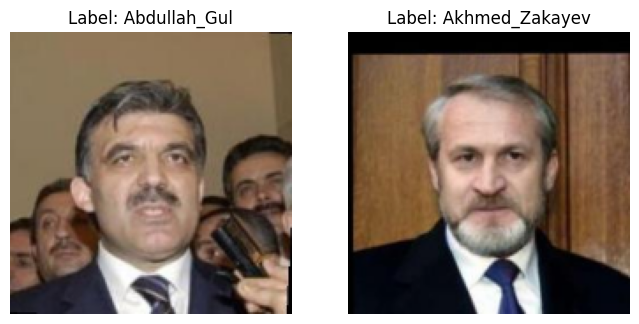

Pair: Adam_Ant vs Abdullah_Gul
Cosine Similarity: -0.02
Same Person: No
----------------------------------------


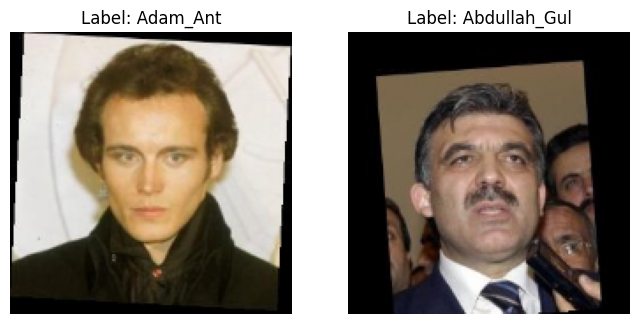

Pair: Adolfo_Aguilar_Zinser vs Akbar_Hashemi_Rafsanjani
Cosine Similarity: 0.21
Same Person: No
----------------------------------------


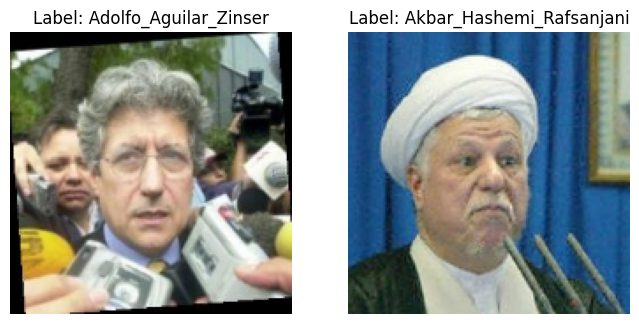

Pair: Al_Pacino vs Alan_Greenspan
Cosine Similarity: 0.08
Same Person: No
----------------------------------------


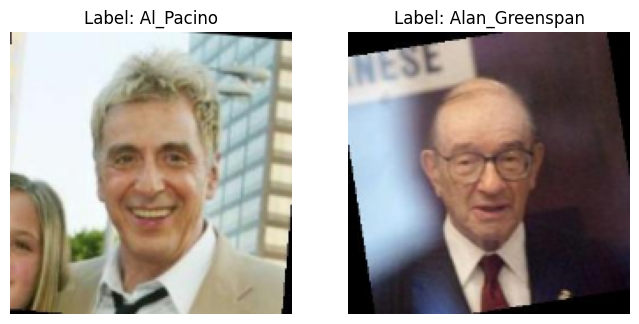

Pair: Adam_Sandler vs Al_Davis
Cosine Similarity: 0.16
Same Person: No
----------------------------------------


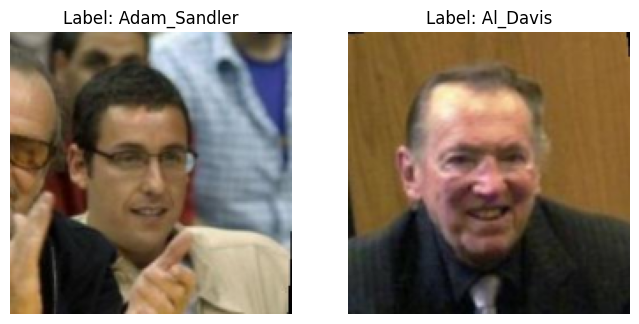

In [ ]:
import random

def verify_faces(embedding1, embedding2, threshold=0.6):
    """
    Verifies whether two face embeddings are from the same person.

    Args:
    - embedding1: First face embedding
    - embedding2: Second face embedding
    - threshold: Cosine similarity threshold for verification (default=0.6)

    Returns:
    - is_same_person (bool): True if same person, False otherwise
    - similarity (float): Cosine similarity score
    """
    # Calculate cosine similarity
    similarity = cosine_similarity([embedding1], [embedding2])[0][0]
    is_same_person = similarity > threshold
    return is_same_person, similarity

# Randomly pick 5 pairs of images for testing
num_pairs = 5
threshold = 0.6  # Adjust the threshold as needed

for _ in range(num_pairs):
    # Randomly pick two images
    idx1, idx2 = random.sample(range(len(images)), 2)
    img1, img2 = images[idx1], images[idx2]
    label1, label2 = labels[idx1], labels[idx2]

    # Verify the pair
    same_person, similarity = verify_faces(image_embeddings[idx1], image_embeddings[idx2], threshold)

    # Display the results
    print(f"Pair: {label1} vs {label2}")
    print(f"Cosine Similarity: {similarity:.2f}")
    print(f"Same Person: {'Yes' if same_person else 'No'}")
    print("-" * 40)

    # Visualize the pair
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    axes[0].imshow(img1)
    axes[0].set_title(f"Label: {label1}")
    axes[0].axis("off")
    axes[1].imshow(img2)
    axes[1].set_title(f"Label: {label2}")
    axes[1].axis("off")
    plt.show()


In [ ]:
# Install DeepFace library
!pip install deepface

from deepface import DeepFace

print("DeepFace library loaded successfully!")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 8.4 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=33c8717e71413533bac1e2cb432d5489d387dfe5a3823e0a3612fbe3ef5a6ab2
  Stored in directory: /root/.cache/pip/wheels/19/39/2f/2d3cadc408a8804103f1c34ddd4b9f6a93497b11fa96fe738e
Successfully built fire
24-11-23 06:42:12 - Directory /root/.deepface has been created
24-11-23 06:42:12 - Directory /root/.deepface/weights has been created
DeepFace library loaded successfully!


In [ ]:
# Generate embeddings for all images using DeepFace
deepface_model_name = "Facenet"  # Using the FaceNet backend in DeepFace for consistency

deepface_embeddings = []
for img in tqdm(images, desc="Generating Embeddings with DeepFace"):
    # Extract embeddings using DeepFace
    embedding = DeepFace.represent(img, model_name=deepface_model_name, enforce_detection=False)

    # Access the embedding from the list
    deepface_embeddings.append(embedding[0]["embedding"])

deepface_embeddings = np.array(deepface_embeddings)
print(f"Embeddings shape (DeepFace): {deepface_embeddings.shape}")


Generating Embeddings with DeepFace: 100%|██████████| 198/198 [02:22<00:00,  1.39it/s]

Embeddings shape (DeepFace): (198, 128)


Pair: Abdullah_Gul vs Adrien_Brody
Cosine Similarity: -0.10
Same Person: No
----------------------------------------


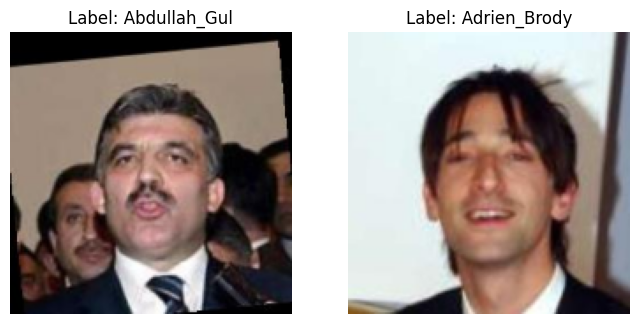

Pair: Abdullah_Gul vs Abdullah_Gul
Cosine Similarity: 0.95
Same Person: Yes
----------------------------------------


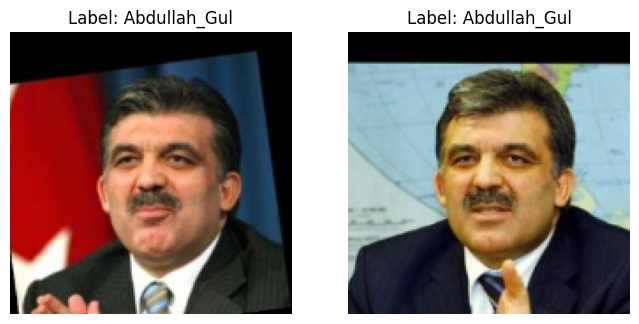

Pair: Abdullah_Gul vs Adrien_Brody
Cosine Similarity: 0.07
Same Person: No
----------------------------------------


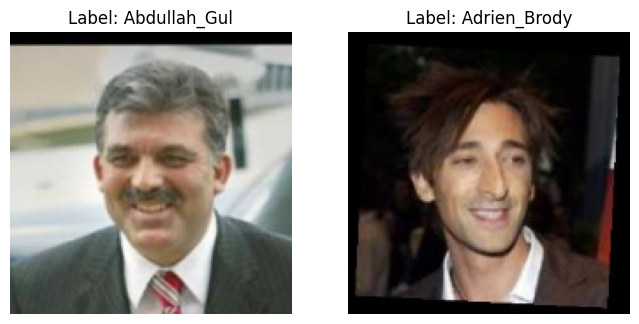

Pair: Al_Sharpton vs Aitor_Gonzalez
Cosine Similarity: 0.09
Same Person: No
----------------------------------------


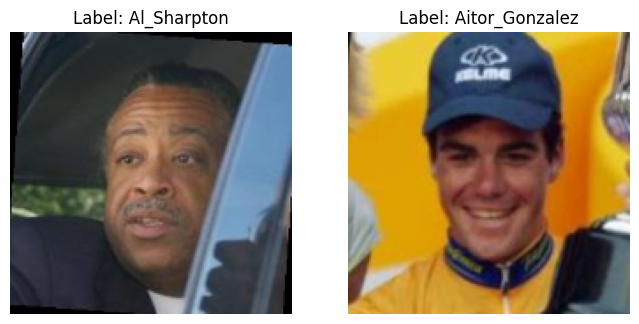

Pair: Adrian_Nastase vs Alan_Jackson
Cosine Similarity: 0.14
Same Person: No
----------------------------------------


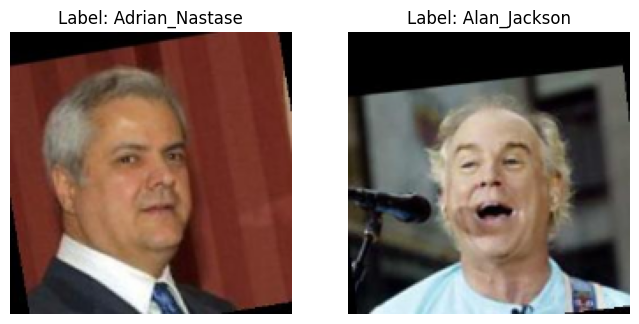

In [ ]:
# Adjust the threshold for DeepFace verification
adjusted_threshold = 0.5  # Reduced from 0.6 to 0.5 to allow more leniency

for _ in range(num_pairs):
    # Randomly pick two images
    idx1, idx2 = random.sample(range(len(images)), 2)
    img1, img2 = images[idx1], images[idx2]
    label1, label2 = labels[idx1], labels[idx2]

    # Verify the pair using DeepFace embeddings
    same_person, similarity = verify_faces(deepface_embeddings[idx1], deepface_embeddings[idx2], adjusted_threshold)

    # Display the results
    print(f"Pair: {label1} vs {label2}")
    print(f"Cosine Similarity: {similarity:.2f}")
    print(f"Same Person: {'Yes' if same_person else 'No'}")
    print("-" * 40)

    # Visualize the pair
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    axes[0].imshow(img1)
    axes[0].set_title(f"Label: {label1}")
    axes[0].axis("off")
    axes[1].imshow(img2)
    axes[1].set_title(f"Label: {label2}")
    axes[1].axis("off")
    plt.show()


## Face Identification Implementation
-	Face identification using FaceNet
-	Face identification using DeepFace
-	Testing and Evaluation
-	Compare FaceNet and DeepSpace
-	Report and Presentation


In [11]:
!pip install deepface


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 59.7 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=91d6c4a919bb1e39fc9b80880fa28c8d88d9457ca2e7f21a0389ea2eca0633f9
  Stored in directory: /root/.cache/pip/wheels/19/39/2f/2d3cadc408a8804103f1c34ddd4b9f6a93497b11fa96fe738e
Successfully built fire


# Face Identification with Facenet
- Create embeddings
- Method 1: Logistic Regression
  - Visualization with Logistic Regression
  - Analysis of failed identification
- Method 2: SVC
  - Visualization with SVC


In [24]:
# Facenet Embeddings

from deepface import DeepFace
import mtcnn
import numpy as np
from tqdm import tqdm  # Import tqdm for the progress bar

# Function to extract embeddings for a batch of images using DeepFace
def extract_embeddings_deepface(images, model_name="Facenet"):
    """
    Extract embeddings from a batch of images using DeepFace.
    - images: Array of images (NumPy arrays of shape (H, W, C)).
    - model_name: The model to use (default is "Facenet").
    """
    embeddings = []
    for img in tqdm(images, desc="Extracting Embeddings", unit="image"):
        try:
            # Convert image array to file if needed
            embedding = DeepFace.represent(img_path=img, model_name=model_name, enforce_detection=False)
            embeddings.append(embedding[0]["embedding"])
        except Exception as e:
            print(f"Error processing image: {e}")
            embeddings.append(np.zeros(128))  # Append zero-vector for consistency
    return np.array(embeddings)

# Extract embeddings
print("Extracting embeddings for training set using DeepFace...")
X_train_embeddings = extract_embeddings_deepface(X_train)

print("\nExtracting embeddings for testing set using DeepFace...")
X_test_embeddings = extract_embeddings_deepface(X_test)

# Convert labels to numpy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

# Print shapes
print(f"Training embeddings shape: {X_train_embeddings.shape}")
print(f"Testing embeddings shape: {X_test_embeddings.shape}")


Extracting embeddings for training set using DeepFace...


Extracting Embeddings: 100%|██████████| 129/129 [00:57<00:00,  2.25image/s]



Extracting embeddings for testing set using DeepFace...


Extracting Embeddings: 100%|██████████| 33/33 [00:14<00:00,  2.27image/s]

Training embeddings shape: (129, 128)
Testing embeddings shape: (33, 128)


In [27]:
# Method 1: Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train the logistic regression model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_embeddings, y_train)

# Evaluate on test set
y_pred = clf.predict(X_test_embeddings)

# Print results
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.88
Classification Report:
                              precision    recall  f1-score   support

               Roger_Clemens       0.00      0.00      0.00         0
               Roger_Federer       1.00      1.00      1.00         3
                 Roger_Moore       1.00      1.00      1.00         1
                Roh_Moo-hyun       1.00      0.86      0.92         7
              Roman_Polanski       0.50      1.00      0.67         1
                Romano_Prodi       1.00      1.00      1.00         2
               Ron_Dittemore       1.00      1.00      1.00         2
               Ronald_Reagan       1.00      1.00      1.00         1
Ronaldo_Luis_Nazario_de_Lima       1.00      1.00      1.00         1
               Roseanne_Barr       1.00      1.00      1.00         1
                Roy_Jones_Jr       1.00      1.00      1.00         1
                   Roy_Moore       0.50      1.00      0.67         1
                Roy_Williams       0.00      0.00  

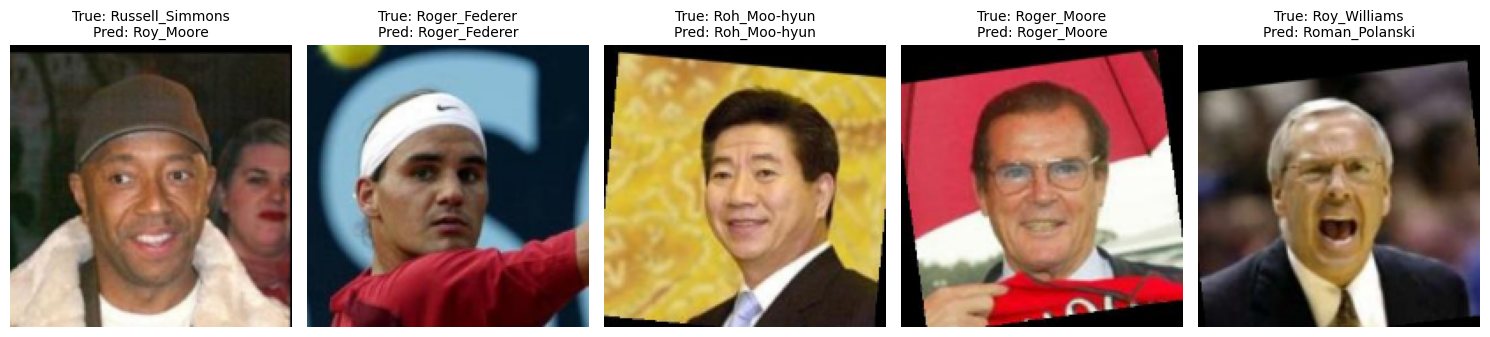

In [28]:
# Visualization with Logistic Regression

import matplotlib.pyplot as plt
import random

def visualize_predictions(X_test, y_test, y_pred, num_samples=10):
    """
    Visualize test images along with their true and predicted labels.

    Parameters:
    - X_test: Test images (NumPy array).
    - y_test: True labels for test images.
    - y_pred: Predicted labels for test images.
    - num_samples: Number of random samples to visualize.
    """
    # Select random indices for visualization
    indices = random.sample(range(len(X_test)), num_samples)

    plt.figure(figsize=(15, 5))
    for i, idx in enumerate(indices):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(X_test[idx])  # Display the test image
        plt.axis("off")
        true_label = y_test[idx]
        pred_label = y_pred[idx]
        plt.title(f"True: {true_label}\nPred: {pred_label}", fontsize=10)
    plt.tight_layout()
    plt.show()

# Call the visualization function
visualize_predictions(X_test, y_test, y_pred, num_samples=5)

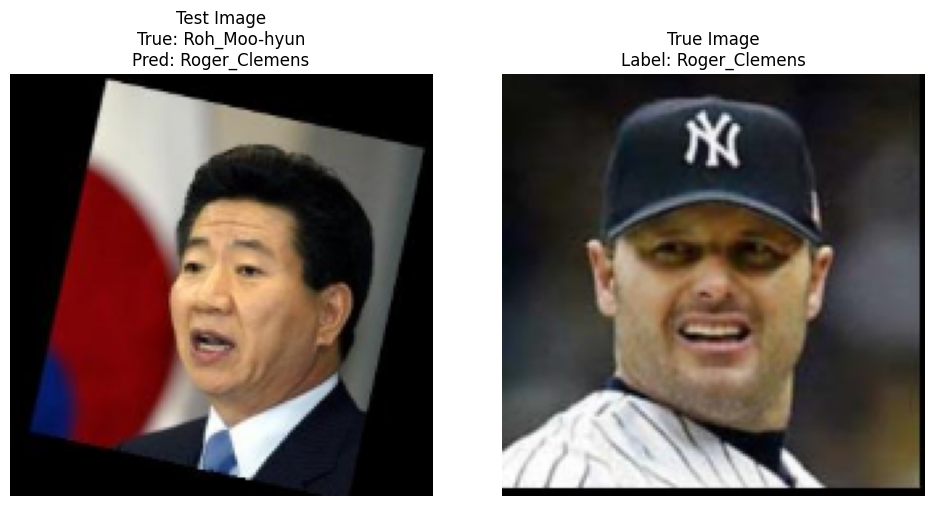

In [31]:
def visualize_failure_case(X_test, X_train, y_test, y_pred, y_train):

    # Find indices where prediction failed
    failed_indices = np.where(y_test != y_pred)[0]

    if len(failed_indices) > 0:
        # Select one failure case to display
        idx = failed_indices[0]

        # Find a training image with the predicted label
        matching_indices = np.where(y_train == y_pred[idx])[0]
        if len(matching_indices) > 0:
            true_image_idx = matching_indices[0]
            true_image = X_train[true_image_idx]
        else:
            true_image = None

        plt.figure(figsize=(10, 5))

        # Plot the failed test image
        plt.subplot(1, 2, 1)
        plt.imshow(X_test[idx])
        plt.axis("off")
        plt.title(f"Test Image\nTrue: {y_test[idx]}\nPred: {y_pred[idx]}", fontsize=12)

        # Plot the true image if available
        if true_image is not None:
            plt.subplot(1, 2, 2)
            plt.imshow(true_image)
            plt.axis("off")
            plt.title(f"True Image\nLabel: {y_pred[idx]}", fontsize=12)
        else:
            print("No matching true image found for the predicted label.")

        plt.tight_layout()
        plt.show()
    else:
        print("No failure cases found!")

# Call the function to visualize a failure case with the true image
visualize_failure_case(X_test, X_train, y_test, y_pred, y_train)


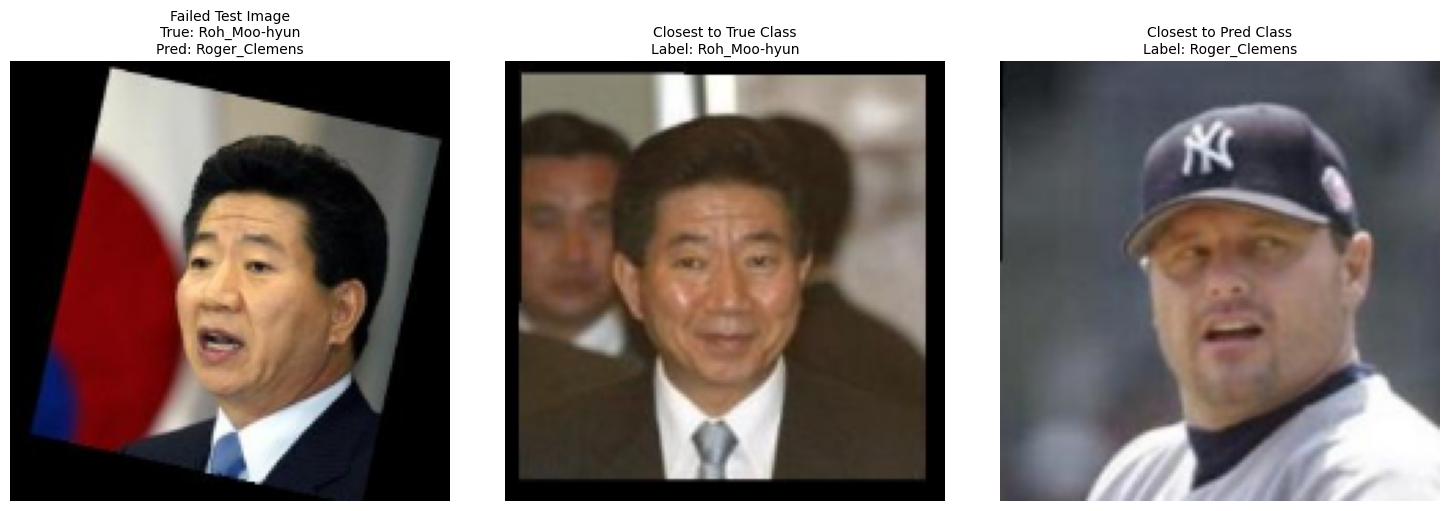

Distance to True Class: 0.5318
Distance to Pred Class: 0.2379


In [32]:
from sklearn.metrics.pairwise import cosine_distances
import matplotlib.pyplot as plt

def analyze_failure_case(X_test, X_train, y_test, y_pred, y_train, X_train_embeddings, X_test_embeddings):

    # Find indices of failed predictions
    failed_indices = np.where(y_test != y_pred)[0]

    if len(failed_indices) > 0:
        # Select one failure case
        idx = failed_indices[0]

        # Embedding of the failed test image
        test_embedding = X_test_embeddings[idx]

        # Embeddings of the true and predicted classes
        true_class_indices = np.where(y_train == y_test[idx])[0]
        pred_class_indices = np.where(y_train == y_pred[idx])[0]

        true_class_embeddings = X_train_embeddings[true_class_indices]
        pred_class_embeddings = X_train_embeddings[pred_class_indices]

        # Compute distances to true and predicted class embeddings
        true_distances = cosine_distances([test_embedding], true_class_embeddings).flatten()
        pred_distances = cosine_distances([test_embedding], pred_class_embeddings).flatten()

        # Find nearest neighbors
        closest_true_idx = true_class_indices[np.argmin(true_distances)]
        closest_pred_idx = pred_class_indices[np.argmin(pred_distances)]

        # Visualize the failed test image and its closest true/predicted neighbors
        plt.figure(figsize=(15, 5))

        plt.subplot(1, 3, 1)
        plt.imshow(X_test[idx])
        plt.axis("off")
        plt.title(f"Failed Test Image\nTrue: {y_test[idx]}\nPred: {y_pred[idx]}", fontsize=10)

        plt.subplot(1, 3, 2)
        plt.imshow(X_train[closest_true_idx])
        plt.axis("off")
        plt.title(f"Closest to True Class\nLabel: {y_test[idx]}", fontsize=10)

        plt.subplot(1, 3, 3)
        plt.imshow(X_train[closest_pred_idx])
        plt.axis("off")
        plt.title(f"Closest to Pred Class\nLabel: {y_pred[idx]}", fontsize=10)

        plt.tight_layout()
        plt.show()

        # Print distances for analysis
        print(f"Distance to True Class: {np.min(true_distances):.4f}")
        print(f"Distance to Pred Class: {np.min(pred_distances):.4f}")

    else:
        print("No failure cases found!")

# Call the function
analyze_failure_case(X_test, X_train, y_test, y_pred, y_train, X_train_embeddings, X_test_embeddings)


In [17]:
# Method 2: SVC

from sklearn.svm import SVC

# Train an SVM classifier
clf = SVC(kernel='linear', probability=True)
clf.fit(X_train_embeddings, y_train)

# Predict on test data
y_pred = clf.predict(X_test_embeddings)

# Evaluate
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.85
Classification Report:
                              precision    recall  f1-score   support

               Roger_Clemens       0.00      0.00      0.00         0
               Roger_Federer       1.00      1.00      1.00         3
                 Roger_Moore       1.00      1.00      1.00         1
                Roh_Moo-hyun       0.86      0.86      0.86         7
              Roman_Polanski       0.33      1.00      0.50         1
                Romano_Prodi       0.67      1.00      0.80         2
               Ron_Dittemore       1.00      1.00      1.00         2
               Ronald_Reagan       1.00      1.00      1.00         1
Ronaldo_Luis_Nazario_de_Lima       1.00      1.00      1.00         1
               Roseanne_Barr       0.00      0.00      0.00         1
                Roy_Jones_Jr       1.00      1.00      1.00         1
                   Roy_Moore       1.00      1.00      1.00         1
                Roy_Williams       0.00      0.00  

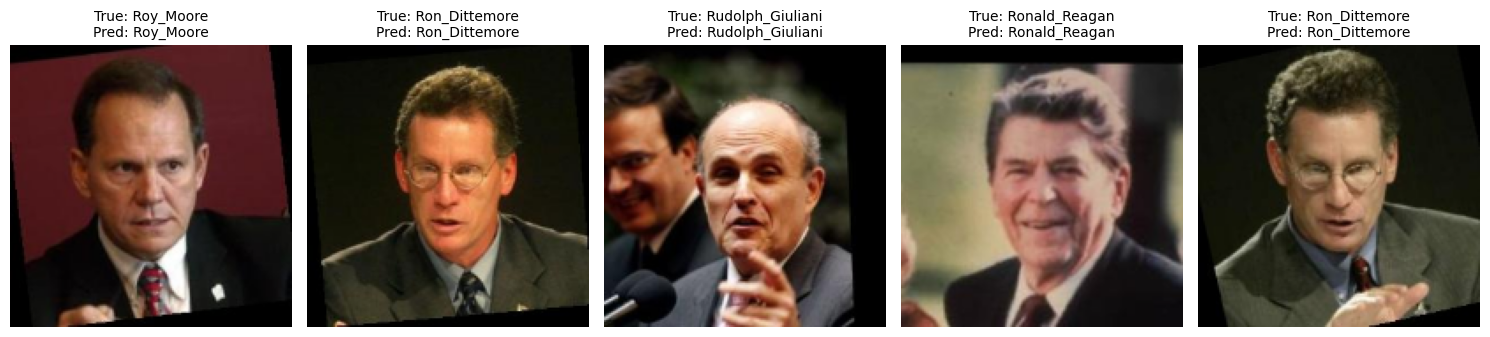

In [18]:
# Visualization with SVC

# Call the visualization function
visualize_predictions(X_test, y_test, y_pred, num_samples=5)

# Face Identification with Deepface
- Create embeddings
- Method 1: Logistic Regression
  - Visualization with Logistic Regression
- Method 2: SVC
  - Visualization with SVC


In [20]:
# Deepface Embeddings

from deepface import DeepFace
import numpy as np
from tqdm import tqdm  # Import tqdm for the progress bar

# Function to extract embeddings for a batch of images using DeepFace
def extract_embeddings_deepface(images, model_name="VGG-Face"):
    """
    Extract embeddings from a batch of images using DeepFace.
    - images: Array of images (NumPy arrays of shape (H, W, C)).
    - model_name: The model to use (default is "VGG-Face").
    """
    embeddings = []
    for img in tqdm(images, desc="Extracting Embeddings", unit="image"):
        try:
            # Use DeepFace to generate embeddings for the image
            embedding = DeepFace.represent(img_path=img, model_name=model_name, enforce_detection=False)
            embeddings.append(embedding[0]["embedding"])
        except Exception as e:
            print(f"Error processing image: {e}")
            embeddings.append(np.zeros(128))  # Append zero-vector for consistency
    return np.array(embeddings)

# Extract embeddings for training and testing sets
print("Extracting embeddings for training set using DeepFace...")
X_train_embeddings = extract_embeddings_deepface(X_train, model_name="VGG-Face")

print("\nExtracting embeddings for testing set using DeepFace...")
X_test_embeddings = extract_embeddings_deepface(X_test, model_name="VGG-Face")

# Convert labels to numpy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

# Print the shapes of the embeddings
print(f"Training embeddings shape: {X_train_embeddings.shape}")
print(f"Testing embeddings shape: {X_test_embeddings.shape}")


Extracting embeddings for training set using DeepFace...


Extracting Embeddings:   0%|          | 0/129 [00:00<?, ?image/s]

24-12-04 17:24:25 - vgg_face_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5
To: /root/.deepface/weights/vgg_face_weights.h5

  0%|          | 0.00/580M [00:00<?, ?B/s]
  0%|          | 2.62M/580M [00:00<00:22, 25.9MB/s]
  2%|▏         | 12.6M/580M [00:00<00:08, 68.6MB/s]
  5%|▍         | 26.7M/580M [00:00<00:05, 101MB/s] 
  7%|▋         | 39.3M/580M [00:00<00:04, 110MB/s]
  9%|▉         | 51.4M/580M [00:00<00:04, 113MB/s]
 11%|█         | 63.4M/580M [00:00<00:04, 107MB/s]
 14%|█▎        | 79.2M/580M [00:00<00:04, 122MB/s]
 16%|█▌        | 91.8M/580M [00:00<00:04, 121MB/s]
 18%|█▊        | 104M/580M [00:00<00:03, 121MB/s] 
 20%|██        | 117M/580M [00:01<00:04, 110MB/s]
 22%|██▏       | 128M/580M [00:01<00:04, 111MB/s]
 24%|██▍       | 141M/580M [00:01<00:03, 114MB/s]
 26%|██▋       | 153M/580M [00:01<00:03, 115MB/s]
 29%|██▊       | 167M/580M [00:01<00:03, 121MB/s]
 31%|███       | 179M/580M [00:01<00:03, 114MB/s]
 33%|███▎      | 192M/580M [00:01<00:0


Extracting embeddings for testing set using DeepFace...


Extracting Embeddings: 100%|██████████| 33/33 [00:25<00:00,  1.27image/s]

Training embeddings shape: (129, 4096)
Testing embeddings shape: (33, 4096)


In [33]:
# Method 1: Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train the logistic regression model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_embeddings, y_train)

# Evaluate on test set
y_pred = clf.predict(X_test_embeddings)

# Print results
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.88
Classification Report:
                              precision    recall  f1-score   support

               Roger_Clemens       0.00      0.00      0.00         0
               Roger_Federer       1.00      1.00      1.00         3
                 Roger_Moore       1.00      1.00      1.00         1
                Roh_Moo-hyun       1.00      0.86      0.92         7
              Roman_Polanski       0.50      1.00      0.67         1
                Romano_Prodi       1.00      1.00      1.00         2
               Ron_Dittemore       1.00      1.00      1.00         2
               Ronald_Reagan       1.00      1.00      1.00         1
Ronaldo_Luis_Nazario_de_Lima       1.00      1.00      1.00         1
               Roseanne_Barr       1.00      1.00      1.00         1
                Roy_Jones_Jr       1.00      1.00      1.00         1
                   Roy_Moore       0.50      1.00      0.67         1
                Roy_Williams       0.00      0.00  

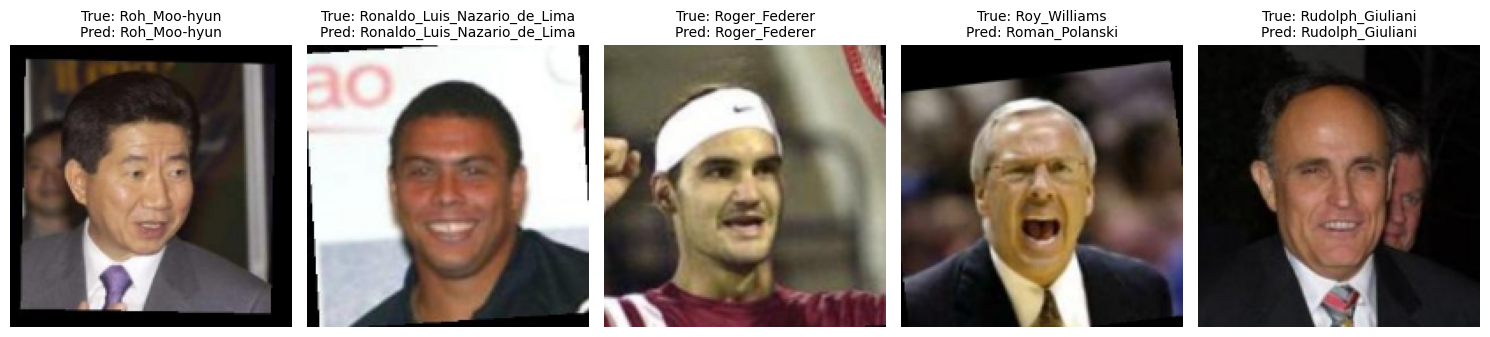

In [34]:
# Visualization with SVC

# Call the visualization function
visualize_predictions(X_test, y_test, y_pred, num_samples=5)

In [35]:
# Method 2: SVC

from sklearn.svm import SVC

# Train an SVM classifier
clf = SVC(kernel='linear', probability=True)
clf.fit(X_train_embeddings, y_train)

# Predict on test data
y_pred = clf.predict(X_test_embeddings)

# Evaluate
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.85
Classification Report:
                              precision    recall  f1-score   support

               Roger_Clemens       0.00      0.00      0.00         0
               Roger_Federer       1.00      1.00      1.00         3
                 Roger_Moore       1.00      1.00      1.00         1
                Roh_Moo-hyun       0.86      0.86      0.86         7
              Roman_Polanski       0.33      1.00      0.50         1
                Romano_Prodi       0.67      1.00      0.80         2
               Ron_Dittemore       1.00      1.00      1.00         2
               Ronald_Reagan       1.00      1.00      1.00         1
Ronaldo_Luis_Nazario_de_Lima       1.00      1.00      1.00         1
               Roseanne_Barr       0.00      0.00      0.00         1
                Roy_Jones_Jr       1.00      1.00      1.00         1
                   Roy_Moore       1.00      1.00      1.00         1
                Roy_Williams       0.00      0.00  

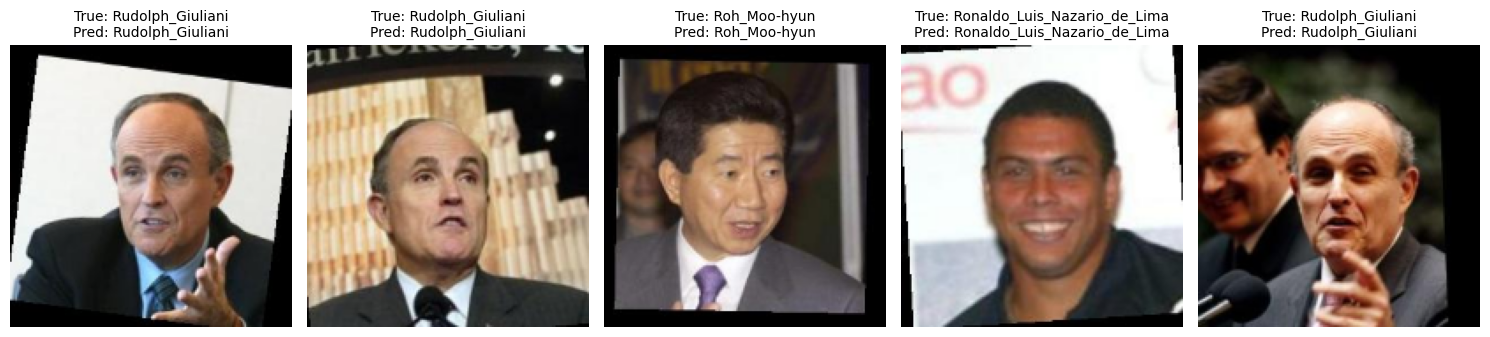

In [36]:
# Visualization with SVC

# Call the visualization function
visualize_predictions(X_test, y_test, y_pred, num_samples=5)